# Physics 404/604

## Computational Physics (Spring 2020)

## BPB-250

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |









# 1. Programing Style: Efficient Algorithm


## 1.1 Programming guide
* Give the correct answers
* clear and easy to read (including documenting itself)
* easy to use
* built up out of small programs that can be tested individually easy to modify and robust  
* Try to use efficient algorithm




## 1.2 Efficient ways to calculate Fibonacci numbers

Fibonacci number
The number series: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, … 
\begin{equation}
F_{n}=F_{n-1}+F_{n-2}
\end{equation}
What is $F_{n}$?


**Dynamic Programming:  
An algorithmic paradigm that solves a complex problem by breaking it into subproblems and stores the results of subproblems to avoid computing the same results again.**

## 1.3.1 Recursion method:

Recursion in computer science is a method of solving a problem where the solution depends on solutions to smaller instances of the same problem.

Most computer programming languages support recursion by allowing a function to call itself from within its own code. 

In [9]:
# Recursion method fib2, 
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

In [3]:
import time
start_time = time.time()
print(fib2(40))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 53.51259994506836 seconds ---


## 1.3.2 Memoization method (Top down):

an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again.

turning [the results of] a function into something to be remembered

In [1]:
# if we have defined an array table = [None]*(n+1)

def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = ... + ... # try this:  please finish this line using recursive method
        
    return table[n]

In [2]:
# calclate time with n=10

import time
n=10
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

# try this: Please calculate time if n=40, 1400, 14000
..

# In programming, the call stack is a buffer that stores requests that need to be handled.

55
--- 0.0004718303680419922 seconds ---
102334155
--- 0.00061798095703125 seconds ---
17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.008594989776611328 seconds ---


RecursionError: maximum recursion depth exceeded in comparison

## 1.3.2  Tabulation Method (bottom-up)
Calculate all the values from small to big

In [3]:
# calculate numbers one by one from table[2] to table[n]

def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
       
    # try this: please finish the following two lines calcuating table[i] from table[i-1] and table[i-2]
    ...
        
    return table[n]

In [4]:
import time
start_time = time.time()
print(fib4(40))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(1400))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(14000)) 
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0005428791046142578 seconds ---
17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.000598907470703125 seconds ---
300246876117846109099549417971502564869274793749079294346837542950223024294228483586340233357521621786581163873038935223918134230775672041461939121779854257599654108106050190530215701900261496471731080880947867560271144036124150073269914583437785632639403707166627432165730532080405530702101979325176283081670158738699488803236223219821984354986527588069961235927512524345713249677285488650870339664336504245433300980200638428685958164929639080300323265489846456158923444513986324260628571159174622288080739105721191265581849979872098730254071206795984080210684977654752224742990461835739477172565325355934619528260128501

## 1.3.3 Using Matrix Algebra (Optional)

$$\left[\begin{array}
{rr}
1 & 1 \\
1 & 0 \\
\end{array}\right]^n=\left[\begin{array}
{rr}
F(n+1) & F(n) \\
F(n) & F(n-1) \\
\end{array}\right]
$$

To calculate F(100), need $A^{100}$ -> $(A^{50})^2$->$A^{25}$->$A^{12}$->$A^6$->$A^3$->$A^1$

In [8]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f
    



In [9]:
import time
start_time = time.time()
print(fib5(40))
print("--- %s seconds ---" % (time.time() - start_time))
import time
start_time = time.time()
print(fib5(14000)) # 93 overflow
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.009502172470092773 seconds ---
30024687611784610909954941797150256486927479374907929434683754295022302429422848358634023335752162178658116387303893522391813423077567204146193912177985425759965410810605019053021570190026149647173108088094786756027114403612415007326991458343778563263940370716662743216573053208040553070210197932517628308167015873869948880323622321982198435498652758806996123592751252434571324967728548865087033966433650424543330098020063842868595816492963908030032326548984645615892344451398632426062857115917462228808073910572119126558184997987209873025407120679598408021068497765475222474299046183573947717256532535593461952826012850191693602073551792238148571064052850079975476925463787570629995816578671884209957706505655213778743330859631234442589530527514612069776150795114358628796784390811755362655769771068650740995128972351005382411964458155682913778466563529792280989115666759565256441826456081786038371722278388967254256057199423000376505262314868810660373

# 2. the complexity of the algorithms

Algorithm complexity is a measure which evaluates the order of the count of operations, performed by a given or algorithm as a function of the size of the input data. To put this simpler, complexity is a rough approximation of the number of steps necessary to execute an algorithm. When we evaluate complexity we speak of order of operation count, not of their exact count. 

For example if we have an order of $N^2$ operations to process N elements, then $N^2$/2 and 3*$N^2$ are of one and the same quadratic order.

Algorithm complexity is commonly represented with the O(f) notation e.g. O($N^2$). We can measure the algorithm complexity by plotting n vs. steps, or n vs. execution time.

In [10]:
import numpy as np
n2=np.arange(1,41,3)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib2(n2[i])
    time2[i] = time.time()-start_time
    print(n2[i],time2[i])


1 8.106231689453125e-06
4 2.574920654296875e-05
7 5.412101745605469e-05
10 0.0002288818359375
13 0.0010840892791748047
16 0.00397491455078125
19 0.015863895416259766
22 0.04591679573059082
25 0.20834612846374512
28 0.9362277984619141
31 3.577853202819824
34 15.648190975189209
37 66.75512027740479
40 261.8471431732178


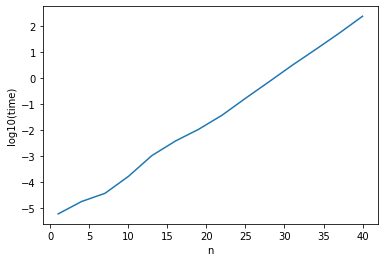

In [9]:
import matplotlib.pyplot as plt
import math

# please make a plot of n2 vs np.log10(time2) and think about how this plot shows that the complexity of fib2 is O(2^N)



In [11]:
# try this: following the above example to calculate the time when n=n2[0], n2[1]...., and make a plot for log10(time) vs n
# for fib4

n2=np.arange(100,100000,100)
time2=np.zeros(n2.size)

for i in range(n2.size):
    
    print(n2[i],time2[i])


100 3.719329833984375e-05
200 5.364418029785156e-05
300 7.081031799316406e-05
400 0.00011801719665527344
500 0.0001678466796875
600 0.00017976760864257812
700 0.00019979476928710938
800 0.0003190040588378906
900 0.0003178119659423828
1000 0.0004239082336425781
1100 0.0003638267517089844
1200 0.0005943775177001953
1300 0.0003819465637207031
1400 0.00043392181396484375
1500 0.0005388259887695312
1600 0.0006310939788818359
1700 0.0007958412170410156
1800 0.0005891323089599609
1900 0.0006577968597412109
2000 0.0007779598236083984
2100 0.0008692741394042969
2200 0.0011138916015625
2300 0.0007760524749755859
2400 0.0005970001220703125
2500 0.0010721683502197266
2600 0.0010502338409423828
2700 0.0007638931274414062
2800 0.001104116439819336
2900 0.0010728836059570312
3000 0.001463174819946289
3100 0.0017442703247070312
3200 0.0012650489807128906
3300 0.0016658306121826172
3400 0.0019259452819824219
3500 0.0018811225891113281
3600 0.0011539459228515625
3700 0.0014567375183105469
3800 0.0018558

31300 0.1468510627746582
31400 0.1330089569091797
31500 0.058712005615234375
31600 0.09334421157836914
31700 0.08413481712341309
31800 0.0663762092590332
31900 0.07549619674682617
32000 0.0788578987121582
32100 0.11067080497741699
32200 0.08070802688598633
32300 0.07341885566711426
32400 0.1292099952697754
32500 0.07951807975769043
32600 0.15610504150390625
32700 0.1538999080657959
32800 0.09753799438476562
32900 0.12094473838806152
33000 0.06519293785095215
33100 0.16736412048339844
33200 0.09987306594848633
33300 0.09955096244812012
33400 0.12886691093444824
33500 0.06858491897583008
33600 0.06229400634765625
33700 0.11957001686096191
33800 0.0886988639831543
33900 0.21338796615600586
34000 0.12848782539367676
34100 0.06634807586669922
34200 0.09885501861572266
34300 0.15416502952575684
34400 0.10533618927001953
34500 0.14473414421081543
34600 0.08198308944702148
34700 0.06374573707580566
34800 0.11074376106262207
34900 0.12379693984985352
35000 0.0921018123626709
35100 0.11852407455

63400 0.42281007766723633
63500 0.6755871772766113
63600 0.47790002822875977
63700 0.5111391544342041
63800 0.32874321937561035
63900 0.37672901153564453
64000 0.39362502098083496
64100 0.3860039710998535
64200 0.451200008392334
64300 0.3982419967651367
64400 0.4542419910430908
64500 0.44133710861206055
64600 0.4002981185913086
64700 0.4534459114074707
64800 0.3819277286529541
64900 0.4810800552368164
65000 0.33280301094055176
65100 0.48383402824401855
65200 0.4245944023132324
65300 0.5210812091827393
65400 0.37467479705810547
65500 0.36490797996520996
65600 0.3446469306945801
65700 0.6562960147857666
65800 0.4468119144439697
65900 0.513664960861206
66000 0.43660688400268555
66100 0.48632311820983887
66200 0.43561697006225586
66300 0.4117119312286377
66400 0.3785521984100342
66500 0.3668811321258545
66600 0.3869359493255615
66700 0.34729599952697754
66800 0.34471797943115234
66900 0.44255805015563965
67000 0.49843621253967285
67100 0.40265393257141113
67200 0.3495450019836426
67300 0.4

96100 0.5558478832244873
96200 0.5331521034240723
96300 0.5224239826202393
96400 0.6405942440032959
96500 0.5884459018707275
96600 0.7220408916473389
96700 0.7064352035522461
96800 0.7783091068267822
96900 0.7106587886810303
97000 0.6490049362182617
97100 0.6699490547180176
97200 0.5870018005371094
97300 0.729008674621582
97400 0.5445451736450195
97500 0.5730619430541992
97600 0.542060136795044
97700 0.5789098739624023
97800 0.5749490261077881
97900 0.5589449405670166
98000 0.5403850078582764
98100 0.5512940883636475
98200 0.6216139793395996
98300 0.5710189342498779
98400 0.5418579578399658
98500 0.546968936920166
98600 0.5646207332611084
98700 0.5471901893615723
98800 0.5912718772888184
98900 0.5590839385986328
99000 0.6083741188049316
99100 0.5728867053985596
99200 0.6010351181030273
99300 0.5570480823516846
99400 0.5132770538330078
99500 0.5771579742431641
99600 0.5073919296264648
99700 0.5313363075256348
99800 0.5015599727630615
99900 0.5192997455596924


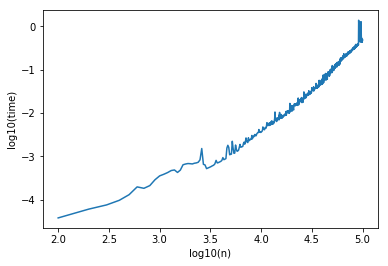

In [20]:
import matplotlib.pyplot as plt
import math
plt.plot(np.log10(n2),np.log10(time2))
plt.xlabel('log10(n)')
plt.ylabel('log10(time)')
plt.show()

# Homework

1) Calculate and plot the ratio F(n)/F(n-1) with respect to n using memorization method. 

2) 

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

    b) For each method, output the time and n into a file
       
    c) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    d) Discuss the complexity of each method.
